<a href="https://colab.research.google.com/github/naagdev/py_boot/blob/master/MCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MCA algorithm is used to find the inverse of a matrix


Original


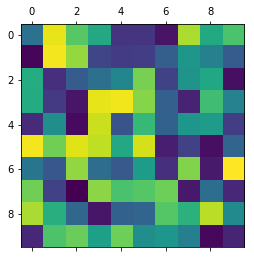

Minor


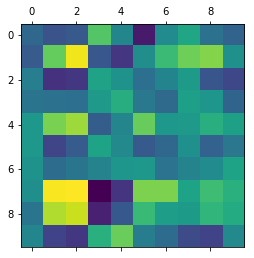



Pulses


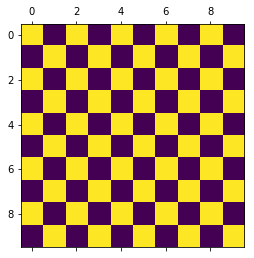



Cofactor


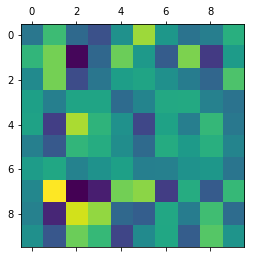



A-1


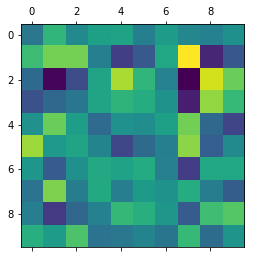



A-1A


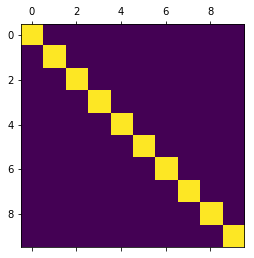

In [7]:
import numpy as np
import random
import matplotlib.pyplot as plt

print("MCA algorithm is used to find the inverse of a matrix")
print("\n")
np.random.seed(42)

a = 10*np.random.random(100).reshape(10,10)
# a = np.array([[1,3,0],[0,-2,8],[7,2,-6]])
row,column = a.shape
i,j = 0,0
def MCA(matrix,row,column):
#     print("Determinant of the matrix is: {0}".format(np.round(np.linalg.det(matrix))))
#     print("\n")
    
    if (np.linalg.det(matrix) != 0):
      #Extracting Minors of a matrix
      minors = np.zeros_like(matrix)
      #Gride of alternating pulses 
      pulses = np.zeros_like(matrix)
      
#       pulses[::2,::2]= 1
#       pulses[1::2,1::2] = 1
      
      for i in range(row):
        for j in range(column):
          
          pulses[i,j] = (-1)**(i+j)
          
          
          filters = np.ones_like(matrix)
          filters[0:,j],filters[i,0:]=0,0
          
          temp0 = filters*a
          
#           print(temp0)
#           print("\n")
#           temp1 = temp0[np.nonzero(temp0)].reshape(row-1,column-1)
          d = temp0[~np.all(temp0==0.,axis=1)]
          d = d.T[~np.all(d.T==0.,axis=1)].T
            
#           print(d)
#           print("\n")
          minors[i,j] = np.round(np.linalg.det(d))
#           print(np.linalg.det(d))
#           print("\n")
      print("Original")
#       print("Original: \n {0}".format(matrix))
      plt.matshow(matrix)
      plt.show()
      print("Minor")
#       print("Minor: \n {0}".format(minors))
      plt.matshow(minors)
      plt.show()
      print("\n")
      print("Pulses")
      #Cofactor matrix: Hadamard multiplication of minors and pulses
#       print("Pulses: \n {0}".format(pulses))
      plt.matshow(pulses)
      plt.show()
      print("\n")
      cofactor = minors*pulses
      print("Cofactor")
#       print("Cofactor: \n {0}".format(cofactor))
      plt.matshow(cofactor)
      plt.show()
      print("\n")
      #Inverse of the matrix: Adjugate matrix = transpose of cofactor * 1/det of original matrix
      A_inv = (cofactor.T)#*(np.round(np.linalg.det(matrix)))
      print("A-1")
#       print("A-1: \n {0}".format(A_inv))
      plt.matshow(A_inv)
      plt.show()
      print("\n")
      print("A-1A")
#       print("A-1A: \n {0}".format((A_inv @ matrix)*(1/np.round(np.linalg.det(matrix)))))
      plt.matshow(np.linalg.inv((A_inv @ matrix)*(1/np.round(np.linalg.det(matrix)))))
      plt.show()
#       print("\n")
#       print("Python built in Inverse output: \n {0}".format(np.linalg.inv(matrix)))
#       plt.matshow(np.linalg.inv(matrix))
#       plt.show()
      
    else:
      print("deteminant of the matrix is zero,therefore it cannot be inversed")
      
   
MCA(a,row,column)